In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read data
df = pd.read_excel('data/data_manufacturing.xlsx')

In [5]:
# Get the names of the columns with categorial variables (object data type)
string_col_names = df.dtypes.index[df.dtypes == 'object']

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the column transformer using a one hot encoder for the columns to transform (string_col_names)
ct = ColumnTransformer(
    transformers=[("encoder", OneHotEncoder(drop="first"), string_col_names)],
    remainder="passthrough",
    verbose_feature_names_out=False,
)

In [7]:
# Perform the transforamtion on the features
data_transformed = ct.fit_transform(df)
# Show the resulting column names
print(ct.get_feature_names_out())

['API Particle Size_Medium' 'API Particle Size_Small'
 'MgSt Supplier_Smith Ind' 'Lactose Supplier_James Ind'
 'Sugar Supplier_Sweet' 'Talc Supplier_Smooth' 'Compressor_COMPRESS2'
 'Coating Supplier_Down' 'Coating Supplier_Mac' 'Mill Time' 'Screen Size'
 'Blend Time' 'Blend Speed' 'Force' 'Coating Viscosity' 'Inlet Temp'
 'Exhaust Temp' 'Spray Rate' 'Atom. Pressure' 'Dissolution']


In [8]:
df = pd.DataFrame(data_transformed, columns=ct.get_feature_names_out())

In [9]:
df

,API Particle Size_Medium,API Particle Size_Small,MgSt Supplier_Smith Ind,Lactose Supplier_James Ind,Sugar Supplier_Sweet,Talc Supplier_Smooth,Compressor_COMPRESS2,Coating Supplier_Down,Coating Supplier_Mac,Mill Time,Screen Size,Blend Time,Blend Speed,Force,Coating Viscosity,Inlet Temp,Exhaust Temp,Spray Rate,Atom. Pressure,Dissolution
0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,27.0,4.0,16.043199,59.887383,25.466691,105.361158,107.945228,70.458995,404.603294,61.007068,79.86
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,11.0,5.0,14.361549,59.793030,24.934062,100.232484,107.540101,70.823684,407.367163,60.571220,72.82
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,20.0,4.0,14.458745,60.797487,25.503908,100.271603,106.605861,69.197350,399.301868,59.088228,74.18
3,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,13.0,3.0,14.412131,59.398624,24.787632,98.008134,106.093734,68.809087,403.733927,58.844630,69.14
4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,13.0,5.0,16.111780,59.921639,25.316775,97.582630,108.257381,69.447385,396.709347,59.589137,73.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,13.836013,59.105242,25.329694,101.600640,107.945423,69.915316,401.016280,61.196363,70.58
86,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,14.0,3.0,16.963847,61.302848,24.578408,102.168031,107.372107,70.598444,402.636540,59.608586,69.70
87,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,9.0,5.0,16.505517,61.216797,25.013860,94.154164,107.142674,69.645683,398.417407,61.742415,77.22
88,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,24.0,4.0,15.339437,60.448580,25.306691,92.519135,107.320049,70.785988,404.073722,61.721232,78.58


In [10]:
# Separate features (first columns) from target (last column)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
from sklearn.model_selection import train_test_split
# Randomly split the data set in 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4245)

In [12]:
from sklearn.preprocessing import StandardScaler
# define scaler object
sc = StandardScaler()
# fit scaler based on training data, scale training data
X_train_sc = sc.fit_transform(X_train)
# scale test data
X_test_sc = sc.transform(X_test)

# Hyperparameter tuning without cross validation

In [13]:
from sklearn.linear_model import Lasso
from sklearn.metrics import root_mean_squared_error

# define alpha list for tuning logarithmically from 1e-3 to 10
alpha = np.logspace(-3, 1, 50)

# define results dicts and lists
rmse = {'train': [], 'test': []}
pred = {'train': [], 'test': []}
n_params = []
# loop over defined alpha values
for a in alpha:
    # define and fit lasso regressor
    reg = Lasso(alpha=a).fit(X_train_sc, y_train)
    # find all non-zero parameter values
    n_params.append(np.count_nonzero(reg.coef_))
    # predict train and testing data
    pred['test'].append(reg.predict(X_test_sc))
    pred['train'].append(reg.predict(X_train_sc))
    # Calculate RMSE
    rmse['test'].append(root_mean_squared_error(pred['test'][-1], y_test))
    rmse['train'].append(root_mean_squared_error(pred['train'][-1], y_train))

# find index of best alpha value
best_idx = np.argmin(rmse['test'])
print(f'Best alpha value: {alpha[best_idx]}')


Best alpha value: 0.13257113655901082


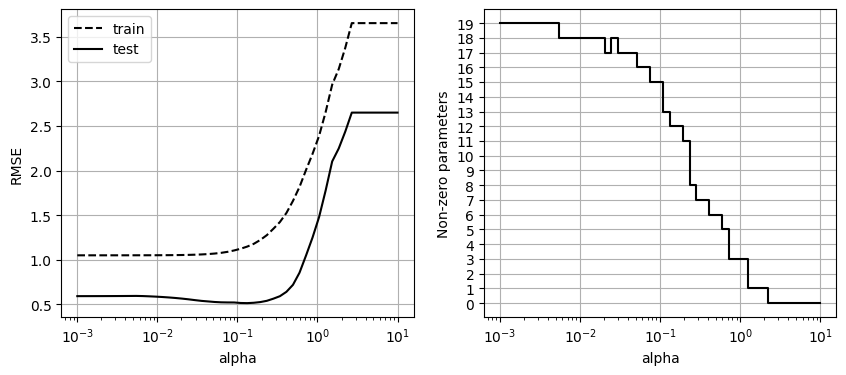

In [14]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

# sublpot 1: Training and testing RMSE over alpha
axs[0].plot(alpha, rmse['train'], '--k', label='train')
axs[0].plot(alpha, rmse['test'], '-k', label='test')
axs[0].legend()
axs[0].set_xlabel('alpha')
axs[0].set_ylabel('RMSE')
axs[0].set_xscale('log')
axs[0].grid()

# subplot 2: Number of non-zero parameter values over alpha
axs[1].step(alpha, n_params, 'k')
axs[1].set_xscale('log')
axs[1].set_ylabel('Non-zero parameters')
axs[1].set_yticks(range(20))
axs[1].set_xlabel('alpha')
axs[1].grid()

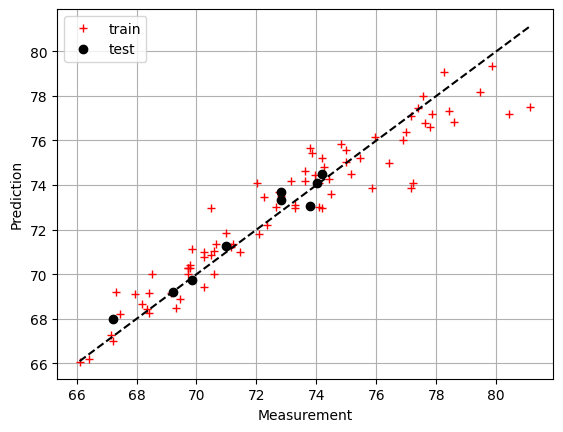

In [15]:
# Parity plot of training and testing data
plt.plot(y_train, pred['train'][best_idx], '+r', label='train')
plt.plot(y_test, pred['test'][best_idx], 'ko', label='test')
plt.plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], 'k--')
plt.grid()
plt.xlabel('Measurement')
plt.ylabel('Prediction')
plt.legend()

In [16]:
from sklearn.metrics import root_mean_squared_error

reg = Lasso(alpha=alpha[best_idx]).fit(X_train_sc, y_train)

y_pred_train = reg.predict(X_train_sc)
y_pred_test = reg.predict(X_test_sc)

print(f'Train MSE: {root_mean_squared_error(y_pred_train, y_train)}')
print(f'Test MSE: {root_mean_squared_error(y_pred_test, y_test)}')

Train MSE: 1.1479705438509464
Test MSE: 0.5142988910637304


# Hyperparameter tuning using cross validation

In [22]:
from sklearn.model_selection import GridSearchCV

regressor = Lasso()

cv = GridSearchCV(
    estimator=regressor,
    param_grid=dict(alpha=alpha),
    scoring="neg_root_mean_squared_error",
    cv=5,
    return_train_score=True
)

cv.fit(X_train_sc, y_train)

print(f"Best params: {cv.best_params_}")

Best params: {'alpha': 0.07543120063354615}


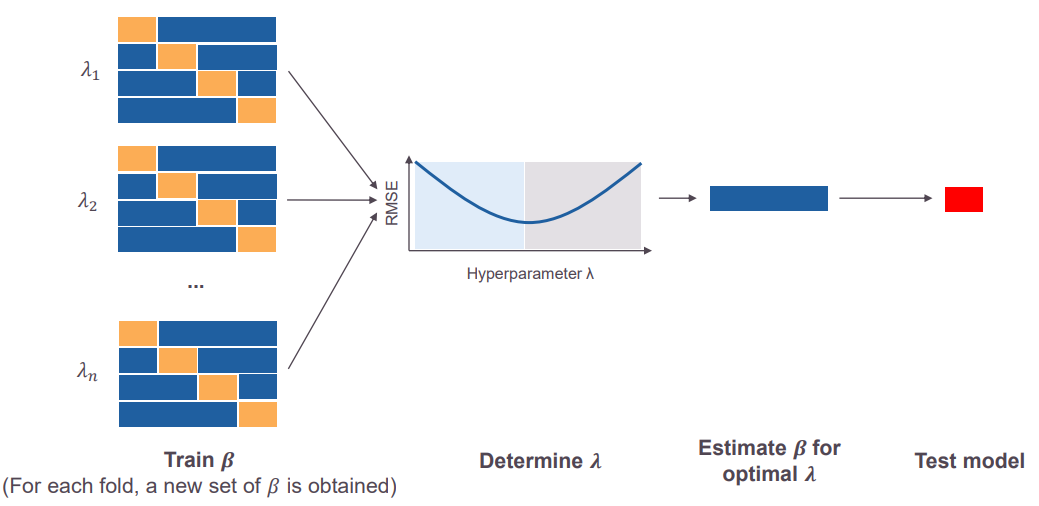

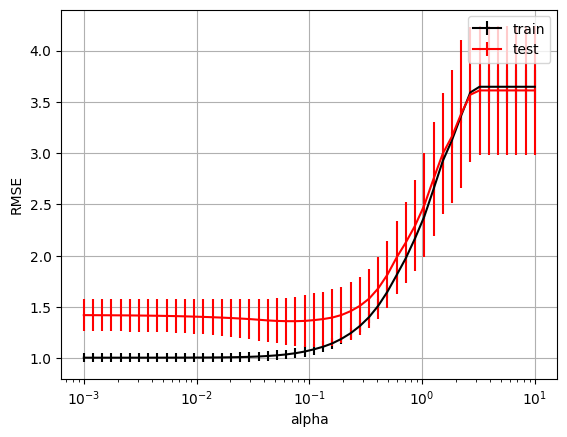

In [36]:
plt.errorbar(x=alpha, y=cv.cv_results_["mean_train_score"]*-1, yerr=cv.cv_results_["std_train_score"], color="k", label="train")
plt.errorbar(x=alpha, y=cv.cv_results_["mean_test_score"]*-1, yerr=cv.cv_results_["std_test_score"], color="r", label="test")

plt.legend()
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.grid()

In [35]:
y_pred_train_cv = cv.best_estimator_.predict(X_train_sc)
y_pred_test_cv = cv.best_estimator_.predict(X_test_sc)

print(f'Train MSE: {root_mean_squared_error(y_pred_train_cv, y_train)}')
print(f'Test MSE: {root_mean_squared_error(y_pred_test_cv, y_test)}')

Train MSE: 1.0891875423899242
Test MSE: 0.5220055786086812
